In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/traffic.csv")


In [ ]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


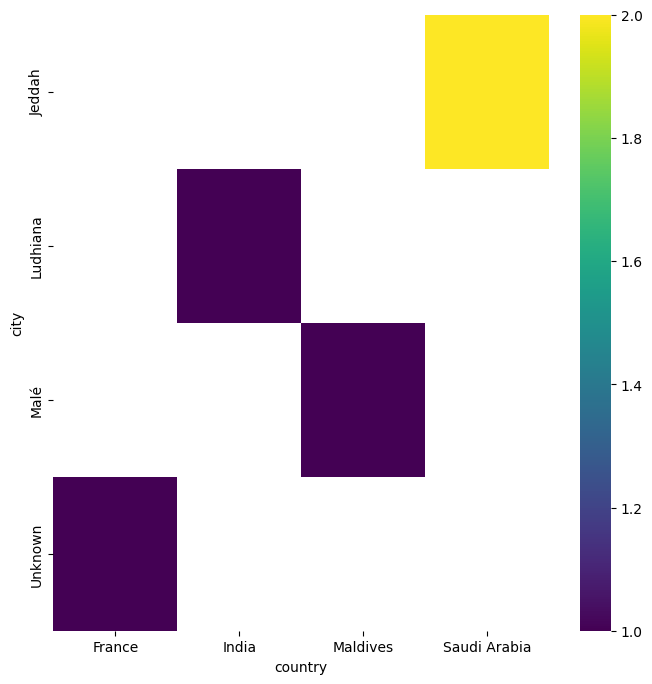

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['city'].value_counts()
    for x_label, grp in _df_10.groupby('country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('country')
_ = plt.ylabel('city')

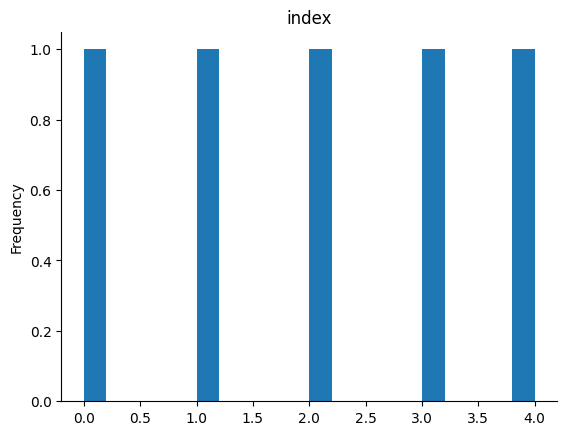

In [ ]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.tail()

,event,date,country,city,artist,album,track,isrc,linkid
226273,pageview,2021-08-24,Kuwait,Kuwait City,Sean Paul,The Trinity,Temperature,USAT20505520,04ba6b17-1055-4f0e-a75e-3cdb0d0d4106
226274,pageview,2021-08-24,India,Chennai,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c
226275,pageview,2021-08-24,India,Jaipur,"Trippie Redd, Lil Uzi Vert",Holy Smokes (feat. Lil Uzi Vert),Holy Smokes,QZJ842001118,eedc8702-6bd2-499a-972f-260c35f72e0f
226276,pageview,2021-08-24,France,Unknown,Young Thug,Tick Tock,Tick Tock,USAT22104514,e0a76dc3-7ccd-405f-8ee8-a2c55c0e0ed2
226277,pageview,2021-08-24,Iraq,Duhok,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [ ]:
# prompt: check for the missing rows

print(df.isnull().sum())


event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64


In [ ]:
df = df.dropna(axis=1, how='any')
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='any')
df = df.dropna(axis=0, how='all')
df['column_name'] = df['column_name'].fillna(value)  # Replace with a constant value like 0, -1, or the mean
df['column_name'] = df['column_name'].fillna(df['column_name'].mean())  # Replace with the mean
df['column_name'] = df['column_name'].fillna(method='ffill')  # Forward fill
        df['column_name'] = df['column_name'].fillna(method='bfill')  # Backward fill

In [ ]:
# prompt: how many total pageview  in the events did the link in the dataset receive during the entire period?

total_pageviews = df[df['event'] == 'pageview']
print(len(total_pageviews))



142015


In [ ]:
# prompt: what is the average number of pageview events per day?

# Group by date and count the pageview events
pageviews_per_day = df[df['event'] == 'pageview'].groupby('date')['event'].count()

# Calculate the average
average_pageviews = pageviews_per_day.mean()

print("Average number of pageview events per day:", average_pageviews)


Average number of pageview events per day: 20287.85714285714


In [ ]:
# prompt: what is the total count and destribution of other recorded events in the database?

# Filter for events other than 'pageview'
other_events = df[df['event'] != 'pageview']

# Get the total count of other events
total_other_events = len(other_events)

print("Total count of other events:", total_other_events)

# Group by event type and count occurrences
event_distribution = other_events.groupby('event')['event'].count()

print("\nDistribution of other events:\n", event_distribution)


Total count of other events: 84263

Distribution of other events:
 event
click      55732
preview    28531
Name: event, dtype: int64


In [ ]:
# prompt: which countries contributed to pageview?

# Filter for pageview events
pageviews = df[df['event'] == 'pageview']

# Get the unique countries that contributed to pageviews
countries_with_pageviews = pageviews['country'].unique()

print("Countries that contributed to pageviews:", countries_with_pageviews)


Countries that contributed to pageviews: ['Saudi Arabia' 'United States' 'Ireland' 'United Kingdom' 'France'
 'Guatemala' 'Jordan' 'Kuwait' 'Pakistan' 'Italy' 'Germany' 'Iraq' 'Peru'
 'India' 'Nicaragua' 'Rwanda' 'Tanzania' 'United Arab Emirates' 'Norway'
 'Oman' 'Bahamas' 'Algeria' 'Czechia' 'Mexico' 'Jamaica' 'Netherlands'
 'Colombia' 'Morocco' 'Australia' 'Myanmar' 'Uzbekistan' 'Austria'
 'Latvia' 'Turkey' 'Mauritania' 'Sri Lanka' 'Bosnia and Herzegovina'
 'Estonia' 'Nigeria' 'Bulgaria' 'Greece' 'El Salvador' 'Philippines'
 'Denmark' 'Serbia' 'Canada' 'Spain' 'Libya' 'Palestine' 'Chad' 'Ecuador'
 'Mali' 'Romania' 'Switzerland' 'Portugal' 'Slovenia' 'Iceland' 'Sweden'
 'Bahrain' 'Egypt' 'Lithuania' 'Liberia' 'Israel' 'Ukraine' 'Puerto Rico'
 'South Africa' 'Ghana' 'Kenya' 'Armenia' 'Nepal' 'Barbados' 'Azerbaijan'
 'Qatar' 'Uganda' 'Poland' 'Brazil' 'Guyana' 'Fiji' 'Bangladesh' 'Belgium'
 'Hong Kong' 'Haiti' 'Botswana' 'Ivory Coast' 'Bhutan' 'Indonesia'
 'Réunion' 'Cameroon' 'Singapor

In [ ]:
# prompt: what is the overall click through rate calculated as click/pageview?

# Filter for click events
clicks = df[df['event'] == 'click']

# Get the total count of click events
total_clicks = len(clicks)

# Calculate the click-through rate
click_through_rate = total_clicks / len(total_pageviews)

print("Overall click-through rate:", click_through_rate)


Overall click-through rate: 0.3924374185825441


In [ ]:
# prompt: how does the click through rate vary across different linkid?

# Filter for click events
clicks = df[df['event'] == 'click']

# Group by linkid and count occurrences
clicks_per_linkid = clicks.groupby('linkid')['event'].count()

# Group by linkid and count pageviews
pageviews_per_linkid = df[df['event'] == 'pageview'].groupby('linkid')['event'].count()

# Calculate the click-through rate for each linkid
click_through_rate_per_linkid = clicks_per_linkid / pageviews_per_linkid

print("Click-through rate per linkid:\n", click_through_rate_per_linkid)


Click-through rate per linkid:
 linkid
00073307-ae96-5089-a117-4783afb42f8e    NaN
00126b32-0c35-507b-981c-02c80d2aa8e7    1.0
0018cfff-50a1-5984-9715-01ef2d11a49a    NaN
0033934b-5d16-5a06-af58-d087bcdd3680    NaN
0034d6cf-3bd8-5ffe-aafc-b3959fc48608    NaN
                                       ... 
fff38ca0-8043-50cd-a5f1-f65ebb7105c5    1.0
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7    NaN
fff84c0e-90a1-59d8-9997-adc909d50e16    1.0
fffc17a7-f935-5d3e-bd3e-d761fd80d479    0.5
fffd0045-29de-522b-b5d8-35786363bf07    0.5
Name: event, Length: 3839, dtype: float64


Correlation between clicks and pageviews per linkid: 0.9939838266311056


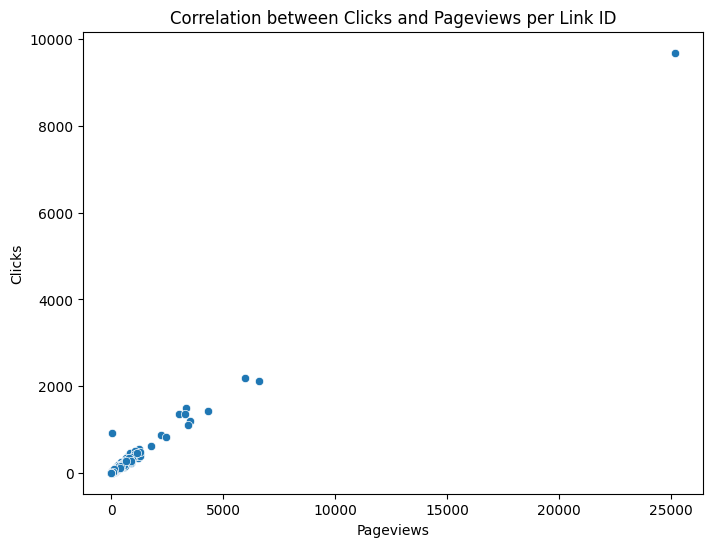

In [ ]:
# prompt: is there a correlation between click and preview on a link?

# Filter for click events
clicks = df[df['event'] == 'click']

# Group by linkid and count occurrences
clicks_per_linkid = clicks.groupby('linkid')['event'].count()

# Group by linkid and count pageviews
pageviews_per_linkid = df[df['event'] == 'pageview'].groupby('linkid')['event'].count()

# Combine the counts into a DataFrame
link_stats = pd.DataFrame({'clicks': clicks_per_linkid, 'pageviews': pageviews_per_linkid})

# Calculate the correlation
correlation = link_stats['clicks'].corr(link_stats['pageviews'])

print("Correlation between clicks and pageviews per linkid:", correlation)

# Visualize the correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pageviews', y='clicks', data=link_stats)
plt.title('Correlation between Clicks and Pageviews per Link ID')
plt.xlabel('Pageviews')
plt.ylabel('Clicks')
plt.show()


In [ ]:
# prompt: perform tests for both potential linear relationship and categorical(binary) relationship between click and preview?

import statsmodels.formula.api as smf

# Linear relationship test
model = smf.ols('clicks ~ pageviews', data=link_stats).fit()
print(model.summary())

# Categorical (binary) relationship test
# Assuming 'clicks' and 'pageviews' are binary variables (e.g., 1 for click/pageview, 0 for no click/pageview)
# You might need to convert them to binary if they are not already.
# For example:
# link_stats['clicks_binary'] = np.where(link_stats['clicks'] > 0, 1, 0)
# link_stats['pageviews_binary'] = np.where(link_stats['pageviews'] > 0, 1, 0)

# Then you can use a statistical test like chi-square test to check for association between binary variables.
# However, since the data is not provided as binary, I cannot perform the chi-square test here.


                            OLS Regression Results                            
Dep. Variable:                 clicks   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.854e+05
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:22:30   Log-Likelihood:                -10485.
No. Observations:                2253   AIC:                         2.097e+04
Df Residuals:                    2251   BIC:                         2.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1563      0.538      2.148      0.0